In [1]:
import os
import torch
from PIL import Image
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models


In [2]:
# Specify the file path
file_path = "../data/processed/dataset.pt"

# Load the dataset
try:
    dataset = torch.load(file_path)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit()

# Print the structure of the dataset
print("Dataset Structure:")
print(dataset)

Dataset Structure:


In [179]:
# Access the tensors from the TensorDataset
data_tensor, label_tensor = dataset.tensors

# Print the dimensions
print("Data Tensor Dimensions:", data_tensor.size())
print("Label Tensor Dimensions:", label_tensor.size())

Data Tensor Dimensions: torch.Size([5000, 3, 224, 224])
Label Tensor Dimensions: torch.Size([5000])


In [176]:
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = models.googlenet(pretrained=False,num_classes=10)

/Users/hrobjarturh/Documents/DTU/MLOps/MLOps/.dev/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hrobjarturh/Documents/DTU/MLOps/MLOps/.dev/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/Users/hrobjarturh/Documents/DTU/MLOps/MLOps/.dev/lib/python3.10/site-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [138]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Train the model
num_epochs = 2

for epoch in range(num_epochs):
    model.train()

    for inputs, labels in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/2], Loss: 0.6737
Epoch [2/2], Loss: 0.3419


In [139]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
input_image = Image.open(filename)


In [141]:
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.ToTensor(),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [167]:
with torch.no_grad():
    output = model(input_batch)

probabilities = torch.nn.functional.softmax(output.logits[0], dim=0)

In [168]:
top5_prob, top5_catid = torch.topk(probabilities, 5)

In [169]:
top5_prob

tensor([0.9583, 0.0061, 0.0054, 0.0051, 0.0047])

In [170]:
top5_catid

tensor([0, 8, 2, 9, 1])

In [163]:
top5_prob.size(0)

1

In [111]:
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
#print(probabilities)

tensor([[-1.1206e-01, -5.2250e-02,  1.1694e-01, -2.1283e-01, -1.6858e-01,
          1.4643e-01,  2.3259e-01, -3.7898e-02, -2.0910e-02, -3.6615e-03,
          7.6031e-02, -9.0571e-02,  3.4441e-01,  7.0252e-02,  1.2703e-01,
          1.2822e-01, -1.0346e-01,  2.3661e-01, -5.5612e-02, -2.2895e-01,
          1.8937e-01,  2.5113e-01, -4.1057e-02,  5.8155e-02,  1.8572e-01,
          3.7330e-01,  1.7247e-01, -2.9284e-02,  1.3095e-01,  8.4575e-02,
          1.0411e-01,  1.9114e-02,  3.9935e-03, -7.4082e-02,  6.8814e-03,
          4.7852e-02, -2.7319e-03, -2.4033e-01,  6.7847e-02, -1.6612e-01,
         -1.3956e-01, -2.2649e-01,  2.2740e-02,  2.4057e-01, -8.8192e-02,
          1.8191e-01,  1.2888e-01,  6.0262e-02,  1.6212e-01, -1.8452e-02,
          4.3388e-01, -2.8925e-02,  3.1295e-01,  1.7975e-01, -3.9285e-02,
         -1.3758e-01, -1.2112e-02,  3.5038e-01,  3.3011e-02, -1.0851e-02,
         -2.1045e-01, -3.3130e-02, -3.8445e-02,  1.0382e-01, -1.6543e-02,
          7.3177e-02, -1.0429e-01,  2.

In [98]:
first_x = next(iter(data_loader))[0]
first_y = next(iter(data_loader))[1]


In [102]:
model.train()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [100]:
outputs = model(first_x)

In [106]:
type(outputs)

torchvision.models.googlenet.GoogLeNetOutputs

In [105]:
first_x

tensor([[[[0.5412, 0.5216, 0.5098,  ..., 0.5843, 0.5961, 0.6078],
          [0.5255, 0.5059, 0.4941,  ..., 0.5804, 0.5922, 0.6039],
          [0.5137, 0.4941, 0.4824,  ..., 0.5765, 0.5843, 0.5922],
          ...,
          [0.6196, 0.6078, 0.6000,  ..., 0.8392, 0.8275, 0.8353],
          [0.6157, 0.6039, 0.6000,  ..., 0.8510, 0.8392, 0.8431],
          [0.6196, 0.6157, 0.6118,  ..., 0.8627, 0.8549, 0.8471]],

         [[0.5059, 0.4863, 0.4706,  ..., 0.5608, 0.5647, 0.5725],
          [0.4902, 0.4706, 0.4549,  ..., 0.5569, 0.5608, 0.5686],
          [0.4745, 0.4549, 0.4392,  ..., 0.5569, 0.5608, 0.5647],
          ...,
          [0.6471, 0.6353, 0.6275,  ..., 0.8549, 0.8431, 0.8510],
          [0.6431, 0.6314, 0.6275,  ..., 0.8667, 0.8549, 0.8588],
          [0.6471, 0.6431, 0.6392,  ..., 0.8784, 0.8706, 0.8627]],

         [[0.4863, 0.4667, 0.4549,  ..., 0.5686, 0.5725, 0.5765],
          [0.4706, 0.4510, 0.4392,  ..., 0.5647, 0.5686, 0.5725],
          [0.4588, 0.4392, 0.4235,  ..., 0

In [107]:
# Train the model
num_epochs = 2

for epoch in range(num_epochs):
    model.train()

    for inputs, labels in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/2], Loss: 7.0501
Epoch [2/2], Loss: 7.0464


In [108]:
with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])

tensor([[-6.3307e-02, -1.0380e-01,  1.2611e-01, -1.1448e-01, -8.8803e-02,
          5.1582e-02,  2.8250e-01, -3.3454e-02,  3.1403e-02, -2.9476e-02,
         -1.0272e-01, -1.1052e-02,  1.1906e-01,  1.4612e-01,  2.0402e-01,
          8.3967e-02, -5.5894e-02,  1.6352e-01, -6.1066e-02, -2.4639e-01,
          2.0372e-01,  2.5142e-01, -1.1322e-01,  7.0386e-02,  1.6845e-01,
          4.0625e-01,  1.5246e-01, -1.3679e-01,  1.1024e-01,  9.6785e-02,
          3.4527e-03,  8.4797e-02,  2.5068e-02,  5.9663e-03, -5.7869e-02,
         -6.2132e-02, -1.3938e-01, -2.0891e-01,  9.4671e-02, -2.1344e-01,
         -8.6121e-02, -1.2363e-01,  4.6359e-02,  1.8811e-01, -7.2359e-03,
          1.9365e-01,  6.4248e-02,  1.9313e-01,  8.6900e-02, -3.2780e-02,
          4.7921e-01,  2.3660e-02,  3.6294e-01,  8.0702e-02, -2.1557e-02,
         -1.5512e-02, -1.0356e-01,  3.5538e-01,  7.3053e-02, -4.0854e-02,
         -2.7061e-01,  1.0660e-01, -1.1958e-01,  6.0472e-02, -2.4615e-01,
          8.7603e-02, -1.9783e-01, -5.

In [49]:
input_batch = dataset.unsqueeze(0) # create a mini-batch as expected by the model

AttributeError: 'TensorDataset' object has no attribute 'unsqueeze'

In [43]:
model.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [171]:
class GoogLeNet:
    pretrained=False
    num_classes=10

In [172]:
gn = GoogLeNet()

In [173]:
gn.num_classes

10

In [72]:
import os

import torch
from PIL import Image
from torchvision import transforms

it2en = {"cane": "dog",
         "cavallo": "horse",
         "elefante": "elephant",
         "farfalla": "butterfly",
         "gallina": "chicken",
         "gatto": "cat",
         "mucca": "cow",
         "pecora": "sheep",
         "ragno": "spider",
         "scoiattolo": "squirrel"}



In [75]:
input_image_path = '../data/raw/farfalla/e030b20a20e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg'
img = Image.open(input_image_path)

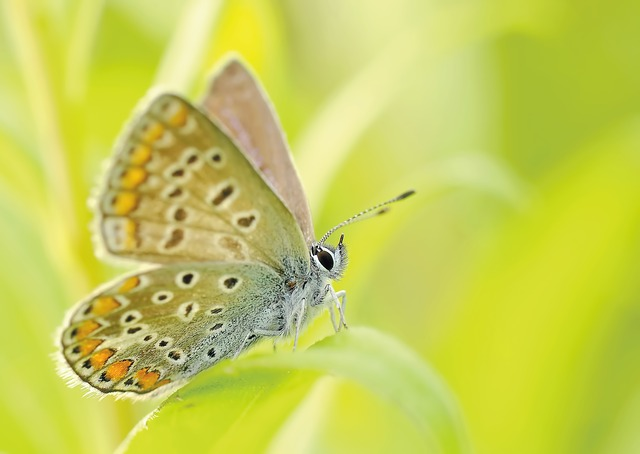

In [76]:
img

In [80]:
IMAGE_SIZE = 224
# Define the transformation
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# resize image and add to list of images
img_resized = transform(img)

In [81]:
img_resized.size()

torch.Size([3, 224, 224])

In [ ]:

data, labels = [ ], [ ]
for animal in it2en.keys():
    input_folder = f'data/raw/{animal}/'
    
    print(f"processing '{it2en[animal]}'")
    count = 0
    num_imgs = len(os.listdir(input_folder))

    # Loop through all files in the input folder
    for file_name in os.listdir(input_folder):
        # Check if the file is an image (you can customize the extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            # Construct the full path of the input image
            input_image_path = os.path.join(input_folder, file_name)
            
            # open image and convert to grayscale
            img = Image.open(input_image_path).convert('L')
            
            IMAGE_SIZE = 224
            # Define the transformation
            transform = transforms.Compose([
                transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                transforms.ToTensor()
            ])

            # resize image and add to list of images
            img_resized = transform(img)
            data.append(img_resized)

            # get target label and add to list of labels
            target = list(it2en.keys()).index(animal)
            labels.append(target)
            
            print(f"{count}/{num_imgs}", end='\r')
            count += 1

        break

data = torch.cat(data, dim=0)
labels = torch.tensor(labels)

print(data.shape)
print(labels.shape)

torch.save(torch.utils.data.TensorDataset(data, labels), 'data/processed/dataset.pt')